<a href="https://colab.research.google.com/github/Someshwar15/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING_Capstone4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **NETFLIX MOVIES AND TV SHOWS CLUSTERING**



##### **Project Type**    - Unsupervised
##### **Contribution**    - Team
##### **Team Member 1 -**Someshwar S Hydrabade
##### **Team Member 2 -**Sarvesha D Kapse


# **Project Summary -**

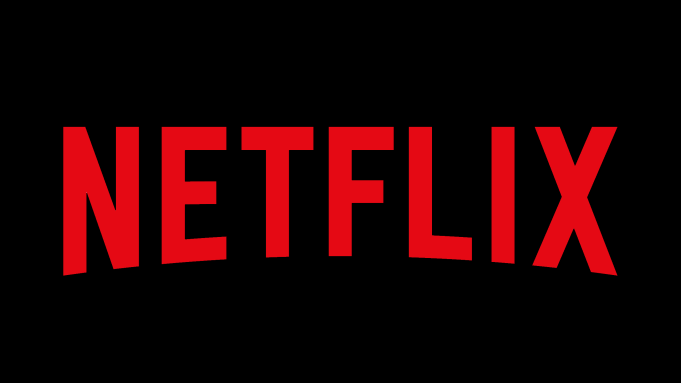

Netflix, the world’s largest on-demand internet streaming media and online DVD movie rental service provider.it Founded August 29, 1997, in Los Gatos, California by Marc and Reed. It has 69 million members in over 60 countries enjoying more than 100 million hours of TV shows and movies per day Netflix is the world’s leading internet entertainment service with enjoying TV series, documentaries, and feature films across a wide variety of genres and languages. I was curious to analyze the content released in Netflix platform which led me to create these simple, interactive, and exciting visualizations and find similar groups of people.

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Fixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset. Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **GitHub Link -**

####Someshwar's link :- https://github.com/Someshwar15/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING
####Sarvesha's link  :-

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings..

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# importing all necessory libraries and
# install packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import missingno as msno
import plotly.express as px
%matplotlib inline

import re
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from nltk.tokenize import TweetTokenizer
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Importing dataset

df = pd.read_csv(r'/content/drive/MyDrive/netflix/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# Dataset First Look


df.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

### Dataset Information

In [ ]:
# Dataset Info
df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
check_dupl = df.duplicated(keep = False).any()
if check_dupl == False:
    print('There are no duplicate rows in our dataset')
else:
    print ('There are duplicate rows in our dataset')

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
null = pd.DataFrame({'No of Total values': df.shape[0] , 'No of NaN Values': df.isnull().sum(),
                     '% of NaN values': round((df.isnull().sum()/df.shape[0])*100, 2)})
null.sort_values('No of NaN Values', ascending = False)

director column has highest *30.68%* NaN values.

cast column has *9.22%* NaN values.

country, date_added, rating columns also containing NaN values.

In [ ]:
df.isna().sum()

In [ ]:
# ploting null values present in dataset

nan = df.isna()
nan.head()

In [ ]:
# Visualizing the missing values

plt.figure(figsize = (10,5))
sns.heatmap(nan)


### What did you know about your dataset?

The given dataset is consist the TV shows and Movies available on Netflix as of 2019. This dataset is about the content that is present on the Netflix platform and the details of it like title, cast, director, release year, rating etc.

The dataset consist 12 columns and 7787 rows in it and data is in textual from that is object data type and only release year column is numerical type.

Dataset does not content any duplicate values but it has some missing values/ null values in it. So we need to treat the all neccesory process and NLP before applying the clutering algorithms.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns


df.columns

In [ ]:
# Dataset Describe
df.describe()

As we see in the dataframe that only 'release_year' column contains the numeric data so it showing only that columns describtion.

In [ ]:
df.describe(include= 'O').T

### Variables Description

**show_id** : Unique ID for every Movie / Tv Show

**type** : Identifier - A Movie or TV Show

**title** : Title of the Movie / Tv Show

**director** : Director of the Movie / TV Show

**cast** : Actors involved in the movie / show

**country** : Country where the movie / show was produced

**date_added** : Date it was added on Netflix

**release_year** : Actual Release year of the movie / show

**rating** : TV Rating of the movie / show

**duration** : Total Duration - in minutes or number of seasons

**listed_in** : Genre

**description**: The Summary description

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df_copy = df.copy()
df_copy['director'].fillna('unknown', inplace =True)
df_copy['cast'].fillna('unknown', inplace =True)
df_copy['country'].fillna('unknown', inplace =True)
df.dropna(subset=['date_added', 'rating'], axis=0, inplace=True)
df_copy['date_added'] = pd.to_datetime(df_copy['date_added'])
df_copy ['listed_in'] = df_copy.listed_in.apply(lambda row: row.split(', '))
df_copy.explode('listed_in')['listed_in'].unique()

### What all manipulations have you done and insights you found?

We have apply the fillna and dropna method for the attributes that content the null or missing values.

We convert date added attribute as datetime Dtype

## 4. ***Discovering Information -  EDA***
Now, we hope our data is ready to analyse. Our job is to find useful insights from the data. For this we will begin with univariate analysis for each variables then we will move to bivariate and multivariate analysis.

### Univariate Analysis

#### 1. Distribution of Type of Content : TV Shows and Movies

#### Chart 1 -  Types of Netflix Content

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(14, 7))
labels=['TV Show', 'Movie']
plt.pie(df['type'].value_counts().sort_values(),labels=labels,explode=[0.01,0.01],
        autopct='%1.2f%%',colors=sns.color_palette("flare",2), startangle=90)
plt.title('Types of Netflix Content')
plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

To better visualize the content that present in the TV shows and Movies we plot the pie chart.

##### 2. What is/are the insight(s) found from the chart?

There is around 69% videos present that are Movies and remaining 31% is as TV Show.
From the pie chart we can see that the movies having the highest no of content than the tv shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This will help to understand the process well in less time of period and it give more insight of the observation to the company

#### Chart 2 - Types of video present on Netflix

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(10,6))
sns.countplot(x=df_copy['type'], data=df_copy, palette='icefire')
plt.xlabel('Type')
plt.ylabel('Number of Shows and Movies')
plt.title('Types of Entertainment Video on Netflix')
plt.show();
content = df_copy['type'].value_counts()
content

##### 1. Why did you pick the specific chart?

We need the check which type has higher number of videos or the content on the Netflix.

##### 2. What is/are the insight(s) found from the chart?

From the chart we know that the highest number of videos present on the Netflix is from Movies type, it has almost the double of the videos that present in the TV show type.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This will help the company to understand the which type has more content in it on there platform and it will help to improve in certain aspect to reach there desirable goals.

#### Chart  3 - Release Year of Content on Netflix

In [ ]:
# Chart - 3 visualization code
# histogram for release dates of movies and tv shows

ticks=np.arange(df_copy.release_year.min(), df_copy.release_year.max()+1,1)
plt.figure(figsize=(15,9))
sns.displot(x='release_year', data= df_copy, kind='hist', height=10, aspect=2, bins=50, hue='type', multiple='dodge', palette='GnBu')
plt.xticks(ticks, rotation=90)
plt.xlabel('Release Year')
plt.title('Distribution of Movies & TV Shows Release Year')
plt.show();

##### 1. Why did you pick the specific chart?

We plot the chart to find out the distribution of Movies & TV Shows Release Year.

##### 2. What is/are the insight(s) found from the chart?

Most of the movies were released on the platform after 2012

Most of the TV Shows were released on the platform after 2015

Highest number of Movies and TV Shows were released on the platform on 2017 year

From above observations we can see that the Netflix has been increasingly focusing on TV Shows rathar than the Movies in recent year.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This will help the company to understand the number of content that available on the platform is released on which year and the which type is on more focus in recent years from Netflix.

#### Chart 4 - Rating of Content on Netflix

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(15,9))
a = df_copy.groupby('rating').agg({'show_id':'count'}).reset_index()
sns.barplot(x=a['rating'], y=a['show_id'], palette='bone')
plt.xlabel('Ratings')
plt.ylabel('Num of Videos')
plt.title('Rating Distribution of TV Shows and Movies on Netflix')
plt.show();

##### 1. Why did you pick the specific chart?

To check the rating distribution of TV Shows and Movies on Netflix we plot this barplot.

##### 2. What is/are the insight(s) found from the chart?

Most of the content on Netflix is rated for *above 14 year old* audiance.
From the barplot we see that the most of the content present on the Netflix is for adult and the above 14 year old audiance

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This will help the company to understand the which rating has more numbers of content availables on there platform and can imorove on there aspect of producing the ratingwise content on Netflix.

#### Chart  5 - Distribution Season of TV Shows

In [ ]:
# Chart - 5 visualization code
tv_show = df_copy[df_copy['type']== 'TV Show']
plt.figure(figsize= (30,6))
sns.countplot(x = tv_show['duration'], data= tv_show, order = tv_show['duration'].value_counts().index)
plt.title('Distribution of TV Show Durations')
plt.show();

##### 1. Why did you pick the specific chart?

We visualize from this chart distribution of TV shows Duration(Seasons).

##### 2. What is/are the insight(s) found from the chart?

Highest number of TV Shows are having only one season.
From the chart TV shows present on Netflix vaires from 1 season to 16 seasons.
There is very few TV shows that have more than Eight seasons.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above chart will help the company to visualize that the how much avg seasons are uploaded in TV Show type. It will help to gain insight that the how many seasons are released by the TV series.

#### Chart  6 - Production Growth Yearly

In [ ]:
# preaparing data to visualize the chart

year_movie = df_copy[df_copy.type =='Movie']['release_year'].value_counts().sort_index(ascending=False).head(10)
year_show = df_copy[df_copy.type =='TV Show']['release_year'].value_counts().sort_index(ascending=False).head(10)
total = df_copy['release_year'].value_counts().sort_index(ascending=False).head(10)


In [ ]:
# Chart - 6 visualization code
sns.set(font_scale = 1)
total.plot(figsize=(10,5), linewidth= 1.5, color='red', label='Total content per year')
year_movie.plot(figsize=(10,5), linewidth= 1.5, color='green', label='Movies per year')
year_show.plot(figsize=(10,5), linewidth= 1.5, color='yellow', label='TV Show per year')
plt.xlabel('Year')
plt.ylabel('Number')
plt.legend()
plt.title('Production yearly', fontsize=20)
plt.show();

##### 1. Why did you pick the specific chart?

We plot the chart to check the production growth based on type of the content and release year.

##### 2. What is/are the insight(s) found from the chart?

Production of the total no of content on Netflix is higher on the year of 2018.

Production of the Movies on Netflix is higher from *2016* to 2018 year.

Production of TV Shows on Netflix is higher from 2018 to 2020 year.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The chart is help to understand the company that the Movies and TV Shows production how much grows yearly and which type production is significantly grows in years. And also the total production of the years.

#### Chart  7 - Top Content Producing Countries

In [ ]:
# Chart - 7 visualization code
# Countires by the content produce on netflix

countries = df_copy.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
countries = countries[countries != 'unknown']
plt.figure(figsize=(12,6))
sns.countplot(y=countries, order=countries.value_counts().index[:15])
plt.xlabel('Title')
plt.ylabel('Country')
plt.title('Top 15 Countires')
plt.show();

##### 1. Why did you pick the specific chart?

To check the countires by the content produce on Netflix we plot the bar and pie chart.

##### 2. What is/are the insight(s) found from the chart?

From the chart we can see the top 15 countries contributed on netflix and United State is highest number of content created country on the netflix followed by India.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The charts is help the company to better understanding the which country has more content produce on Netflix platform and improve there marketing strategy in repective countries.

#### Chart  8 -  Content Producing Countries Globaly

In [ ]:
# Chart - 8 visualization code
# distribution of content on basis of countries

country_all = df.groupby(['country','type']).count()['show_id'].reset_index()
country_count = {}
for i in range(len(country_all)):
    c = country_all['country'][i].split(', ')
    for x in c:
        x = re.sub('[^A-Za-z0-9 ]+', '', x)
        if x not in country_count.keys():
            country_count[x] = country_all['show_id'][i]
        else:
          country_count[x] += country_all['show_id'][i]
country_df = pd.DataFrame(list(zip(country_count.keys(), country_count.values())), columns =['country', 'count'])
#visualization
iplot([go.Choropleth(locations = list(country_count.keys()),
            locationmode='country names',
            z = list(country_count.values()),
            text = country_df['country'])])


##### 1. Why did you pick the specific chart?

We plot distribution of content on basis of countries on the world map.

##### 2. What is/are the insight(s) found from the chart?

We can see from the world map that which country produces the how much content.
From the chart we can see that United State produces the highets number of content followed by the India

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This chart have shows the content producing countries on the global map. It will help the company to better understanding of the which countries have more content. and help the insight for company to take business decisions related to production, distribution and marketing.

#### Chart  9 - Top Directors

In [ ]:
# Chart - 9 visualization code
# Top directors or popular directors on netflix

directors = df_copy[df_copy.director != 'unknown'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(12,6))
sns.countplot(y=directors, order=directors.value_counts().index[:10], palette='pastel')
plt.title('Top 10 Directors')
plt.show();

##### 1. Why did you pick the specific chart?

We visualize the Top directors or popular directors present on Netflix

##### 2. What is/are the insight(s) found from the chart?

We can see that the top 10 directors are on Netflix with most number of content are mostly International.
Jan Suter is top director with high no of content directed on netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This will help the industry to undersrtand the top ten directors that directed the content on Netflix. It will help the insight that the reach out the popular directors for the future content directions that will produce under netflix production,

#### Chart  10 - Top Actors

In [ ]:
# Chart - 10 visualization code
# Top 10 actors in movies based on number movies acted in

cast_movies = df_copy[df_copy.cast != 'unknown'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(12,6))
sns.countplot(y=cast_movies, order=cast_movies.value_counts().index[:10], palette='bright')
plt.title('Top 10 Actor acted in Movies on Netflix')
plt.show();

##### 1. Why did you pick the specific chart?

We Visualize the Top 10 actors in movies based on number movies acted in on the Netflix

##### 2. What is/are the insight(s) found from the chart?

Highest number of actors are Indian in the top 10 actors acted in movies present on the Netflix.
Top actor who acted highest no of movies is Anupam Kher followed by Shah Rukh Khan.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Above chart help the industry to know the which top ten actors are acted in content that present on the Netflix. It will help the industry to understand the popularity of the actors that acted in mostly content on netflix.


#### Chart  11 -  Distribution Duration of Movies

In [ ]:
# Chart - 11 visualization code
# ploting the duration time for the movies
t = df_copy[df_copy['type']=='Movie'].loc[:,['show_id', 'duration']].copy()
cast = (t['duration'].to_list())

newlist =[]
for genre in cast:
  newlist.append(int(genre.split(' ')[0]))
country_list = pd.DataFrame({'Duration': newlist, 'id': np.arange(0,len(newlist),1)})
sns.displot(x='Duration', data=country_list, kind='hist', height=10, aspect=2, bins=50)
plt.xlabel('Minutes')
plt.xticks(ticks=np.arange(0,country_list.Duration.max()+1,10))
plt.title('Distribution of Movie Duration')
plt.show();

##### 1. Why did you pick the specific chart?

We visualize from this chart distribution of Movie Duration(time).

##### 2. What is/are the insight(s) found from the chart?

The highest duration is about *90* to *110* *min* for movies
From this distribution of movies length ranges from 3 min to 312 min and from chart we can see that the distribution is almost normally distributed

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Above chart shows the average duration of movies distribution it will help to understand the what is most common time duration is available on the platform

#### Chart  12 - Top Genre

In [ ]:
# Chart - 12 visualization code
# Top 10 genre of movies on netflix

plt.figure(figsize=(12,6))
df_copy[df_copy["type"]=="Movie"]["listed_in"].value_counts()[:10].plot(kind="barh",color="black")
plt.title("Top 10 Genres of Movies",size=18)


##### 1. Why did you pick the specific chart?

We visualize the barplot to see Top 10 genre of movies present on Netflix.

##### 2. What is/are the insight(s) found from the chart?

Top genre that content highets number of content on Netflix is Documentaries.
Stand-Up Comedy and Dramas, International Movies genre contains are equal number of content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This chart help the Netflix to understand the which genre has more content present on the platform. And it give insight to improve the growth of the content streaming by uploading the popular genre more on platform.

#### Chart  13 -  Words Present in Title

In [ ]:
# Chart - 13 visualization code
# most occured word in title

word_cloud = df_copy['title']
text = ''. join(word for word in word_cloud)

# stop word list
stopword = set(STOPWORDS)

# word cloud image

word = WordCloud(stopwords= stopword, background_color='Yellow',width=1920,height=1080).generate(text)
plt.rcParams['figure.figsize']=(15,7)
plt.imshow(word, interpolation='bilinear')
plt.axis('off')
plt.show()

##### 1. Why did you pick the specific chart?

To check the most occured word in title we plot worldcloud.

##### 2. What is/are the insight(s) found from the chart?

It look like words like 'Love', 'Last', 'Man', 'de' are most used in titles.
There is word 'Christmas' also occured maybe those movies are released on December.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This chart or the wordcloud image helps the Netflix to identify the frequent words that used in titles, Netflix could used its search engine algorithm to return more accurate results. It will help the industry to build the best recommender that provide more personalized experience for the users, that will help the Netflix to increase the subscribers.

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
# preparing data for heatmap

rating_age = {'TV-PG': 'Older Kids', 'TV-MA': 'Adults', 'TV-Y7-FV': 'Older Kids',
          'TV-Y7': 'Older Kids', 'TV-14': 'Teens', 'R': 'Adults', 'TV-Y': 'Kids',
          'NR': 'Adults', 'PG-13': 'Teens', 'TV-G': 'Kids', 'PG': 'Older Kids',
          'G': 'Kids', 'UR': 'Adults', 'NC-17': 'Adults'}

df_copy['rating_age'] = df_copy['rating'].replace(rating_age)
# data for correlation

df_copy['count'] = 1
heatmap = df_copy.groupby('country')[['country', 'count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
heatmap = heatmap[heatmap != 'unknown']
heatmap = heatmap['country']

corr = df_copy.loc[df_copy['country'].isin(heatmap)]
corr = pd.crosstab(corr['country'], corr['rating_age'], normalize = 'index').T
corr
# Correlation Heatmap visualization code

countries =['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Egypt']
rating = ['Adults', 'Teens', 'Older Kids', 'Kids']

plt.figure(figsize=(12,6))
sns.heatmap(corr.loc[rating, countries], cmap='YlGnBu', linewidth=2.5, fmt='1.0%', annot_kws={'fontsize':12}, annot=True)
plt.show()


##### 1. Why did you pick the specific chart?

We visualize the correlation between the countries and rating of streaming content on Netlfix.

##### 2. What is/are the insight(s) found from the chart?

The United state and United Kingdom are close to correlate the rating age means both countries people prefers to watch similar type of content.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

1.movies for kids and older kids are having at least two hours long.

2.movies for kids and older kids are not having two hours long.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
hypothesis = df_copy
hypothesis['rating'].unique()

In [ ]:
hypothesis = hypothesis[hypothesis['type'] == 'Movie']

rating_age = {'TV-PG': 'Older Kids', 'TV-MA': 'Adults', 'TV-Y7-FV': 'Older Kids',
          'TV-Y7': 'Older Kids', 'TV-14': 'Teens', 'R': 'Adults', 'TV-Y': 'Kids',
          'NR': 'Adults', 'PG-13': 'Teens', 'TV-G': 'Kids', 'PG': 'Older Kids',
          'G': 'Kids', 'UR': 'Adults', 'NC-17': 'Adults'}

hypothesis['ages'] = hypothesis['rating'].replace(rating_age)
hypothesis['ages'].unique()

In [ ]:
hypothesis['ages'] = pd.Categorical(hypothesis['ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])
hypothesis['duration'] = hypothesis['duration'].astype(str).str.extract('(\d+)')
hypothesis['duration'] = pd.to_numeric(hypothesis['duration'])
group_by = hypothesis[['duration', 'ages']].groupby(by='ages')

group = group_by.mean().reset_index()
group


In [ ]:
K = group_by.get_group('Kids')
O = group_by.get_group('Older Kids')

K_M = K.mean()
K_S = K.std()

O_M = O.mean()
O_S = O.std()
print('Movies rated for Kids Mean{}\nMovies rated for older kids Mean{}'.format(K_M,O_M))
print('Movies rated for Kids Std{}\nMovies rated for older kids Std{}'.format(K_S,O_S))

In [ ]:
# Perform Statistical Test to obtain t-Value

K_n = len(K)
O_n = len(O)
print(K_n, O_n)

dof = K_n + O_n - 2
print('dof', dof)

sp_2 = ((O_n-1)*K_S**2 + (K_n-1)*O_S**2)/dof
print('SP 2 =', sp_2)

sp = np.sqrt(sp_2)
print('SP', sp)

t_value = (K_M - O_M)/(sp*np.sqrt(1/K_n + 1/O_n))
print('tvalue', t_value[0])

In [ ]:
# t-distribution
stats.t.ppf(0.025,dof)

In [ ]:
# t-distribution
stats.t.ppf(0.975,dof)

t-value is not in range so the null hypothesis is  rejected.

So, movies rated for kids and older kids are not longer than the two hours.

##### Which statistical test have you done to obtain t-Value?

We used the t.ppf function to calculate the value of t for a given probability (q) and degrees of freedom (df)

##### Why did you choose the specific statistical test?

To get a 95% confidence interval, we need to find the cutoff points that enclose 95% of the probability distribution. This can be done using the t.ppf() function with q values of 0.025 and 0.975 for the lower and upper cutoff points respectively. The degrees of freedom (df) argument is usually the sample size minus 1 for a single population sampling problem.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

More than 90 mins durations are movies

More than 90 mins durations are Not movies

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
hypoth = df_copy

hypoth['duration'] = hypoth['duration'].astype(str).str.extract('(\d+)')
hypoth['duration'] = pd.to_numeric(hypoth['duration'])

In [ ]:
hypoth['type'] = pd.Categorical(hypoth['type'], categories=['Movie', 'TV Show'])

group_by = hypoth[['duration', 'type']].groupby(by='type')
group = group_by.mean().reset_index()
group

In [ ]:
M = group_by.get_group('Movie')
S = group_by.get_group('TV Show')

M_m = M.mean()
M_s = M.std()

S_m = S.mean()
S_s = S.std()

print('Mean {}'.format(M_m, S_m))
print('Std {}'.format(M_s, S_s))

In [ ]:
# Perform Statistical Test to obtain t-Value

M_n = len(M)
S_n = len(S)
print(M_n, S_n)

dof = M_n + S_n - 2
print('dof',dof)

sp_2 = ((S_n-1)*M_s**2 + (M_n-1)*S_s**2)/dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

t_val = (M_m - S_m)/(sp*np.sqrt(1/M_n + 1/S_n))
print('tvalue', t_val[0])

In [ ]:
stats.t.ppf(0.025, dof)

In [ ]:
stats.t.ppf(0.975, dof)

t-value are not in range so the *null hypothesis is rejected.

So, from that the duration more than the 90 min are movies.

##### Which statistical test have you done to obtain P-Value?

We used the t.ppf function to calculate the value of t for a given probability (q) and degrees of freedom (df)

##### Why did you choose the specific statistical test?

To get a 95% confidence interval, we need to find the cutoff points that enclose 95% of the probability distribution. This can be done using the t.ppf() function with q values of 0.025 and 0.975 for the lower and upper cutoff points respectively. The degrees of freedom (df) argument is usually the sample size minus 1 for a single population sampling problem.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

We have used fillna and dropna method for the missing values before starting the EDA.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
# Handling Outliers & Outlier treatments
# outlier in release year
plt.figure(figsize=(8,6))
sns.boxplot(df_copy.release_year)
plt.show()

In [ ]:
# replacing ouylier with mean value

Q1 = df_copy.release_year.quantile(0.25)
Q3 = df_copy.release_year.quantile(0.75)
IQR = Q3 - Q1
print(f'release_year Q1 ={Q1}\nrelease_year Q3 = {Q3}\nrelease_year IQR = {IQR}')

We don't have release year greater than 2018

In [ ]:
outlier = df_copy[(df_copy.release_year < (Q1 - 1.5 * IQR)) | (df_copy.release_year > (Q3 + 1.5 * IQR))]

df_copy['release_year'] = np.where(df_copy['release_year'] <2009, df_copy.release_year.mean(), df_copy['release_year'])

In [ ]:

plt.figure(figsize=(8,6))
sns.boxplot(df_copy.release_year)
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

The dataset is consist of object data type as it most of the column contain textual data / observation. only the release year consit int data type so we check outlier and treated with replacing it with mean value.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
df_copy.columns

In [ ]:
# coverting listed_in into string type
df_copy['listed_in'] = df_copy['listed_in'].apply(lambda x: str(x))

In [ ]:
# creating new column no_category

no_category = []
for categories in df_copy.listed_in.values:
  len_categories = len(categories.split(','))
  no_category.append(len_categories)

In [ ]:
df_copy['no_category'] = no_category
df_copy[['listed_in', 'no_category']].head()


In [ ]:
df_copy.no_category.value_counts()

#### 3. Removing Punctuations

In [ ]:
import string

In [ ]:
# Remove Punctuations


def remove_punct(text):
  ''' this function is used for removing the
  punctuation marks from text'''

  for punctuation in string.punctuation:
    text = text.replace(punctuation, '')
  return text

In [ ]:
df_copy['description'] = df_copy['description'].apply(remove_punct)
df_copy['description'][0:3]

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

In [ ]:
def delete_stopwords(description):
  ''' this function will take the text data
   as input and delete the stopwords from it.'''

  clean_text= [i.lower() for i in description.split() if i.lower() not in stop_words]
  return ' '.join(clean_text)     # join the list of words with space separator

In [ ]:
df_copy['description'] = df_copy['description'].apply(delete_stopwords)
df_copy['description'][0:3]

#### 7. Tokenization

In [ ]:
# Tokenization
tokenizer = TweetTokenizer()

#### 8. Text Normalization

In [ ]:
# function to lemmatize the corpus

def lemmatize_verb(words):
  lemmatizer = WordNetLemmatizer()
  lemma = []
  for word in words:
    lemmas = lemmatizer.lemmatize(word, pos='v')
    lemma.append(lemmas)
  return lemma

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

vocab = [ ]
count_vocab = []

for key, value in dictionary:
  vocab.append(key)
  count_vocab.append(value)


In [ ]:
# storing the count in pandas dataframe

vocab_stem = pd.DataFrame({'word': vocab, 'count': count_vocab})

vocab_stem = vocab_stem.sort_values('count', ascending=False)    # sort the dataframe


In [ ]:
top_vocab = vocab_stem.head(15)

top_words = top_vocab.word.values
top_words


In [ ]:
top_words_count = top_vocab['count'].values
top_words_count

In [ ]:
plt.figure(figsize=(10,5))
plt.barh(top_words, top_words_count)
plt.xlim(18135, 18152)
plt.show()

**Snowball Stemmer**

In [ ]:
# creating stemming function
stemmer = SnowballStemmer('english')

def stemming(text):
  '''function for each words stem in text'''
  text = [stemmer.stem(word) for word in text.split()]
  return ' '.join(text)

In [ ]:
# stemming the description

df_copy['description'] = df_copy['description'].apply(stemming)
df_copy['description'][0:4]


**TF-IDF Vectorization**

In [ ]:
# TfidfVectorizer

# creating the object for Tfid Vectorizer
tfid_vect = TfidfVectorizer()
# fit the vectorizer
tfid_vect.fit(df_copy['description'])
# collect the vocabulary item that used in vectorizer
dictionary = tfid_vect.vocabulary_.items()


In [ ]:
# list to store the vocab and count

vocab = [ ]
count_vocab = []

# iterate through each vocab and count and append to the lists.
for key, value in dictionary:
  vocab.append(key)
  count_vocab.append(value)

In [ ]:
# store the count in panda dataframe

vocab_after_stem = pd.DataFrame({'word': vocab, 'count': count_vocab})

vocab_after_stem = vocab_after_stem.sort_values('count', ascending=False)


In [ ]:
top_voacb_after = vocab_after_stem.head(15)

top_words_after = top_voacb_after.word.values
top_words_after

In [ ]:
top_words_count_after = top_voacb_after['count'].values
top_words_count_after

In [ ]:
plt.figure(figsize=(10,5))
plt.barh(top_words_after, top_words_count_after)
plt.xlim(14237, 14253)
plt.show()

In [ ]:
# adding new column length of description

df_copy['length(desc)'] = df_copy['description'].apply(lambda x: len(x))

Listed_in column

In [ ]:
# removing punctuations from listed_in column

df_copy['listed_in'] = df_copy['listed_in'].apply(remove_punct)

In [ ]:
# removing stopwords from listed_in column

df_copy['listed_in'] = df_copy['listed_in'].apply(delete_stopwords)

In [ ]:
# creating the countvectorizer

count_vect = CountVectorizer()
count_vect.fit(df['listed_in'])
dict_listed = count_vect.vocabulary_.items()
dict_listed


In [ ]:
vocab = [ ]
count_vocab = []

for key, value in dict_listed:
  vocab.append(key)
  count_vocab.append(value)


In [ ]:
vocab_listed_stem = pd.DataFrame({'word': vocab, 'count': count_vocab})

vocab_listed_stem = vocab_listed_stem.sort_values('count', ascending=False)


In [ ]:
top_listed_vocab = vocab_listed_stem.head(15)

top_listed_words = top_listed_vocab.word.values
top_listed_words

In [ ]:
top_listed_words_count = top_listed_vocab['count'].values
top_listed_words_count

In [ ]:
plt.figure(figsize=(8,5))
plt.barh(top_listed_words, top_listed_words_count)
plt.xlim(28, 45)
plt.show()

**stemming**

In [ ]:
# stemming

df_copy['listed_in'] = df_copy['listed_in'].apply(stemming)
df_copy['listed_in'][0:2]

**TF-IDF Vectorization**

In [ ]:
# creating the object for Tfidf Vectorizer

tfid_vect = TfidfVectorizer()
tfid_vect.fit(df_copy['listed_in'])
dict_listed = tfid_vect.vocabulary_.items()
dict_listed

In [ ]:
vocab = [ ]
count_vocab = []

for key, value in dict_listed:
  vocab.append(key)
  count_vocab.append(value)


In [ ]:
vocab_listed_after_stem = pd.DataFrame({'word': vocab, 'count': count_vocab})

vocab_listed_after_stem = vocab_listed_after_stem.sort_values('count', ascending=False)

In [ ]:
top_listed_after_vocab = vocab_listed_after_stem.head(15)
top_listed_after_words = top_listed_after_vocab.word.values
top_listed_after_words

In [ ]:
top_listed_after_words_count = top_listed_after_vocab['count'].values
top_listed_after_words_count

In [ ]:
plt.figure(figsize=(8,5))
plt.barh(top_listed_after_words, top_listed_after_words_count)
plt.xlim(25, 40)
plt.show()


In [ ]:
# adding new column length of listed_in

df_copy['length(list)'] = df_copy['listed_in'].apply(lambda x:len(x))

##### Which text normalization technique have you used and why?

Removing Stopwords

Removing Punctuations

Lowering the case

Text Vectorization (Count & TF-IDF)

Stemming (Snowball Stemmer)

This are the techniques we have used for the text normalization, we have used snowball stemmer for stemming. It is used for reducing a word to its base word or stem in such a way that the words of similar kind lie under a common stem.

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
# Vectorizing Text
# creating the countvectorizer

count_vect = CountVectorizer()
count_vect.fit(df['description'])
dictionary = count_vect.vocabulary_.items()
dictionary

##### Which text vectorization technique have you used and why?

We have used the count vectorization technique for the text vectorization. It is one of the simplest way of doing text vectorization.

Count vectorization fit and learn the word vocabulary and try to create a document term matrix in which the individual cells denote the frequency of that word in a particular document

We will also using the TF-IDF vectorization which is term frequency-inverse document frequency, it gives a measure that takes the importance of a word into consideration depending on how frequently it occurs in a document.

TF-IDF is similar to the count vectorization method, in the TF-IDF method, a document term matrix is generated and each column represents an individual unique word.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# crating the feature variable

feature = df_copy[['no_category', 'length(desc)', 'length(list)']]


#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data
scaler = preprocessing.StandardScaler()

x_scale = scaler.fit_transform(feature)
X = x_scale
silhouette_score_ = []
range_cluster = [i for i in range(2,18)]

##### Which method have you used to scale you data and why?

We have used the StandardScaler() method for the scaling the data

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model  1 - **Silhouette Score**

In [ ]:
# ML Model - 1 Implementation
for clusters in range_cluster:
  Kmean_cluster = KMeans(n_clusters = clusters)
  pred = Kmean_cluster.fit_predict(X)
  center = Kmean_cluster.cluster_centers_

  score = silhouette_score(X, pred)
  silhouette_score_.append([int(clusters), round(score, 3)])
  print('For n_clusters = {}, silhouette score {}'. format(clusters, score))
# Fit the Algorithm

# Predict on the model

In [ ]:
clust = pd.DataFrame(silhouette_score_, columns=['n clusters', 'silhouette score'])
clust = clust.sort_values('silhouette score', ascending=False)
clust.head()

In [ ]:
range_cluster = [i for i in range(2,17)]

for clusters in range_cluster:
  fig, (ax1, ax2) = plt.subplots(1,2)  # creating the subplot
  fig.set_size_inches(12,6)

  ax1.set_xlim([-0.1, 1])  # 1st subplot is silhouette plot
  ax1.set_ylim([0, len(X)+(clusters+1)*10])

  Kmean_cluster = KMeans(n_clusters=clusters, random_state=10)
  clust_labels = Kmean_cluster.fit_predict(X)

  # average values for silhouette score
  silhouette_avg = silhouette_score(X, clust_labels)
  print('For n_clusters =', clusters, 'The avg silhouette_score is :', silhouette_avg)

  # silhiuette score for each sample
  sample_silhouette_values = silhouette_samples(X, clust_labels)

  y_lower = 10
  for i in range(clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[clust_labels == i]

    ith_cluster_silhouette_values.sort()

    size_clust_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_clust_i

    color = cm.nipy_spectral(float(i)/clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    ax1.text(-0.05, y_lower + 0.5 * size_clust_i, str(i))
    y_lower = y_upper + 10

  ax1.set_title('Silhouette plot for Various clusters')
  ax1.set_xlabel('Slihouette coefficient values')
  ax1.set_ylabel('Cluster label')

  ax1.axvline(x=silhouette_avg, color='red', linestyle='--')
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
  ax1.set_yticks([])

  # 2nd subplot showing the actual cluster
  color = cm.nipy_spectral(clust_labels.astype(float)/clusters)
  ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=color, edgecolor='k')

  center = Kmean_cluster.cluster_centers_
  ax2.scatter(center[:, 0], center[:, 1], marker='o', c='white', alpha=1, s=200, edgecolor='k')



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
kmean = KMeans(n_clusters=17, init = 'k-means++', random_state=50)
y_pred = kmean.fit_predict(X)

# silhouette score
score = silhouette_score(X, y_pred)
print('Silhouette score is {}'.format(score))


In [ ]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, y_pred)


In [ ]:
df_copy['cluster'] = y_pred
plt.figure(figsize=(12,6))
sns.countplot(x='cluster', hue ='type', lw=5, data=df_copy)

Cluster one has highest number of data point for movies and for TV Shows cluster number 13 content highest clusters.

Slihouette score is used to evaluate the quality of clusters that crated by using clustering algorithms such as K-means. It shows the how well samples are clustered with other samples that are similar to each other.

Silhouette Score can be used to study the separation distance between the resulting clusters. The plot of silhouette shows th a measure of how close each point in one cluster.

The value of silhouette coefficient is [-1, 1]. A score 1 denotes the data point is very compact within cluster which is good and it far away from the other clusters. The worst value is -1. Values near 0 denotes overlapping cluster.

### ML Model  2 - **Elbow Method**

In [ ]:
# ML Model - 2 Implementation

# elbow method
sum_sq_dist = {}
for k in range(1,15):
  Kmean = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
  Kmean = Kmean.fit(X)
  sum_sq_dist[k] = Kmean.inertia_

In [ ]:
# plotting the graph for the sum square distance value and no of clusters
sns.pointplot(x=list(sum_sq_dist.keys()), y=list(sum_sq_dist.values()))
plt.xlabel('Number of Cluster')
plt.ylabel('Sum of Square Distance')
plt.title('Elbow Method for Optimal K')
plt.show()

From the graph we will take number of cluster as 3

In [ ]:
# we will use 3 cluster

Kmean_clust = KMeans(n_clusters = 3)
Kmean_clust.fit(X)
Kmeans = Kmean_clust.predict(X)


In [ ]:
plt.figure(figsize=(10,5))
plt.title('description and listed_in')
plt.scatter(X[:, 0], X[:, 1], c=Kmeans, s=50, cmap='spring')

centers = Kmean_clust.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()


K-Means elbow visualizer shows the elbow method of selecting the optimal number of cluster for K-Means clustering.

When all the metrics are plotted. It gives best value for k, the line chart look like an arm and then elbow(the point of inflection on the curve) is the best value of k. The arm can beeither up or down, but if there is strong inflection point then it is good indication that the underlying model fits best at the point.

**Contentwise Cluster**

In [ ]:
# contentwise clustering for Kmeans

df_copy['clusters'] = Kmean.labels_

def word_count(category):
  print('Exploring Cluster', category)
  column = ['type', 'title', 'country', 'rating', 'listed_in', 'description']
  for i in column:
    word_cloud = df_copy[['clusters',i]].dropna()
    word_cloud = word_cloud[word_cloud['clusters']==category]
    text = ''.join(word for word in word_cloud[i])

    stopwords = set(STOPWORDS)

    wordcloud = WordCloud(stopwords = stopwords, background_color='black',width=1920,height=1080).generate(text)

    plt.rcParams['figure.figsize'] = (10,6)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    print('\u001b[1m ''Looking for insight from', i, 'of Movies/TV Show')
    plt.show()


In [ ]:
# worldcloud for cluster 2

word_count(2)

In [ ]:
# worldcloud for cluster 3

word_count(3)

We have creat the function for building a wordcloud for cloumns as 'type', 'title', 'country', 'rating', 'listed_in', 'description'. using kmeans clustering algorithm

### ML Model  3 -  **Hierarchical Clustering**

In [ ]:
# ML Model - 3 Implementation
# ML Model - 3 Implementation

import scipy.cluster.hierarchy as sch

hierar = sch.linkage(X, method='ward', metric='euclidean')

# Fit the Algorithm

# Predict on the model

In [ ]:
# Dendogram

plt.figure(figsize=(20,12))
dendo = sch.dendrogram(hierar)
plt.xlabel('Content')
plt.ylabel('Euclidean Distance')
plt.title('Dendrogram')
plt.axhline(y =20, color='r', linestyle='--')
plt.show()

Dendrogram is tree diagram used to display the relationship between the data points in hierarchical clustering algorithm.

### ML Model  3 -  **Agglomerative Clustering**



In [ ]:
# Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
hierarchical = AgglomerativeClustering(n_clusters=14, affinity='euclidean', linkage='ward')
y_pre = hierarchical.fit_predict(X)

In [ ]:
# silhouette score
score = silhouette_score(X, y_pre)
print('Silhouette score is {}'.format(score))

In [ ]:
davies_bouldin_score(X, y_pre)

In [ ]:
df_copy['hierarchical_cluster'] = hierarchical.labels_

plt.figure(figsize=(12,6))
sns.countplot(x='hierarchical_cluster',hue ='type', lw=5, data=df_copy)
plt.show()

Cluster one has highest number of data point for movies and for TV Shows cluster number eight content highest clusters.

We have bulid the cluster using Agglomerative clustering algorithm.

We build the 14 clusters successfully using agglomerative clustering.

**Contentwise Cluster**

In [ ]:
# contentwise clustering for hierarchical

df_copy['hierarchical_cluster'] = hierarchical.labels_

def word_count(category):
  print('Exploring Cluster', category)
  column = ['type', 'title', 'country', 'rating', 'listed_in', 'description']
  for i in column:
    word_cloud = df_copy[['hierarchical_cluster',i]].dropna()
    word_cloud = word_cloud[word_cloud['hierarchical_cluster']==category]
    text = ''.join(word for word in word_cloud[i])

    stopwords = set(STOPWORDS)

    wordcloud = WordCloud(stopwords = stopwords, background_color='black',width=1920,height=1080).generate(text)

    plt.rcParams['figure.figsize'] = (10,6)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    print('\u001b[1m ''Looking for insight from', i, 'of Movies/TV Show')
    plt.show()


In [ ]:
# worldcloud for cluster 2

word_count(2)


In [ ]:
# worldcloud for cluster 4

word_count(4)

We have creat the function for building a wordcloud for cloumns as 'type', 'title', 'country', 'rating', 'listed_in', 'description'. using hierarchical clustering algorithm

#**Content Based Recommendation System**

In [ ]:
# importing libraries

from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# loading the dataset
recom_df = df.copy()
recom_df.head(5)


In [ ]:
# handling the Null/Missing Values

recom_df[['cast', 'director', 'country']]=recom_df[['cast', 'director', 'country']].fillna('unknown')
recom_df['rating'].fillna(recom_df['rating'].mode()[0], inplace=True)
recom_df.dropna(axis=0, inplace=True)
recom_df.fillna('', inplace=True)


In [ ]:
# wrangling the data

recom_df['country'] = recom_df['country'].apply(lambda x: x.split(',')[0])
recom_df['listed_in'] = recom_df['listed_in'].apply(lambda x: x.split(',')[0])
recom_df['duration'] = recom_df['duration'].apply(lambda x:int(x.split()[0]))

**creating feature**

In [ ]:
# combine the clustering variable in one column

recom_df['clustering_var'] = (recom_df['director']+' '+ recom_df['cast']+' '+
                             recom_df['country']+' '+ recom_df['listed_in']+' '+
                             recom_df['description'])

**Textual Data Preprocessing**

In [ ]:
# Removing the non-ASCII characters

def remove_non_ascii(words):
  new_words = []
  for word in words:
    new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    new_words.append(new_word)
  return new_words

recom_df['clustering_var'] = remove_non_ascii(recom_df['clustering_var'])

In [ ]:
# removing stopwords and lower case



def stopwords(text):
  text = [word.lower() for word in text.split() if word.lower() not in sw]
  return ' '.join(text)

recom_df['clustering_var'] = recom_df['clustering_var'].apply(stopwords)


In [ ]:
# removing punctuations

def remove_pun(text):
  trans = str.maketrans('', '', string.punctuation)
  return text.translate(trans)

recom_df['clustering_var'] = recom_df['clustering_var'].apply(remove_pun)


In [ ]:
# function to lemmatize the corpus

def lemmatize_verb(words):
  lemmatizer = WordNetLemmatizer()
  lemma = []
  for word in words:
    lemmas = lemmatizer.lemmatize(word, pos='v')
    lemma.append(lemmas)
  return lemma

recom_df['clustering_var'] = lemmatize_verb(recom_df['clustering_var'])


In [ ]:
# tokenization

tokenizer = TweetTokenizer()
recom_df['clustering_var'] = recom_df['clustering_var'].apply(lambda x: tokenizer.tokenize(x))

Preparing data for function

In [ ]:
# changing index from show_id to show title
recom_df['show_id'] = recom_df.index

# convert token to string
def convert(lis):
  return ' '.join(lis)

recom_df['clustering_var'] = recom_df['clustering_var'].apply(lambda x: convert(x))

In [ ]:
# changing the index to title of movies/tv shows
recom_df.set_index('title', inplace =True)

In [ ]:
# count vectorizer
CV = CountVectorizer()
convert_matrix = CV.fit_transform(recom_df['clustering_var'])

In [ ]:
# cosine similarity
cosine_similarity = cosine_similarity(convert_matrix)

**Function for Recommendation system**

In [ ]:
# creating the function to get 10 recommendation for show

indices = pd.Series(recom_df.index)

def recomm_10(title, cos_sim = cosine_similarity):
  try:
    recomm_content = []
    id = indices[indices == title].index[0]
    series = pd.Series(cos_sim[id]).sort_values(ascending=False)
    top_10 = list(series.iloc[1:11].index)

    for i in top_10:
      recomm_content.append(list(recom_df.index)[i])
    print('If you liked {}'.format(title), 'you may also like:\n')
    return recomm_content

  except:
    return 'Invalid Entry'

**Result**

In [ ]:
# checking recommendation system

recomm_10('Stranger Things')

In [ ]:
recomm_10('Zubaan')

In [ ]:
recomm_10('Game of Thrones')

We have build a simple content based recommendation system based on the similarity of the show.

To get the similarity score of the contents, we have used cosine similarity

The similarity of two vectors (A and B) is calculated by taking the dot product of the two vectord and dividing it by the magnitude values.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

From the clustering analysis we can use topic modeling.

Can be apply different clustering algorithms. More time could be given on clustering analysis.

Can be improve the recommender system and building a working app on this recommender system.

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this project we have done work on the text clustering problem where we had group the Netflix shows into clusters such that the content within a cluster are similar to each other and the content that are differnt clusters are dissimilar to each other. We have concluded as follow:

**Exploratory Data Analysis (EDA)**

The most content type is from Movies on Netflix. 39% of content is from "TV Show" type and 61% is from "Movies".

The highest count content on Netflix is made with "TV-MA" rating.

The country that produced highest number of content is United State followed by India.

The most popular director with highest number of content directed is Jan Suter

The most popular actor with highest number of content acted in is Anupam Kher.

Most of the content from the genre is "International Movies"

**Clustering**

We have cluster the data before that we have preprocessed the data and then vectorized using countvectorizer and TFIDF vectorizer.

We have built cluster using K-means clustering algorithm we obtained clusters from Slihouette score and elbow method analysis.

Then clusters where built on Hierarchical clustering algorithm we have obtained optimal number of clusters after visualizing the dendrogram.

Recommendation **System**

Then we build content based recommender system using cosine similarity. This recommender system will make 10 recommendation to the user based on the show they watched.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***